In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
#read data
data = pd.read_csv('../processed_data/processed_data.csv')

In [4]:
data

,sample_id,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,...,idx16,idx17,idx18,idx19,idx20,idx21,idx22,idx23,idx24,idx25
0,APO-posterior-3_0,1.000000,0.493922,0.386059,0.327881,0.308968,0.297193,0.293624,0.270029,0.244872,...,0.023397,0.005338,0.004975,0.046523,0.027957,0.017595,0.022027,0.017629,0.000000,0.007891
1,APO-posterior-3_1,1.000000,0.719015,0.588909,0.502701,0.499939,0.530826,0.496770,0.459206,0.416370,...,0.183570,0.124213,0.095432,0.078016,0.057799,0.019683,0.008263,0.000000,0.050674,0.331227
2,APO-posterior-3_2,1.000000,0.470099,0.351843,0.319095,0.297336,0.290344,0.329047,0.385536,0.408548,...,0.057416,0.034983,0.018419,0.004494,0.000000,0.058074,0.054322,0.076267,0.202895,0.031331
3,APO-posterior-3_3,1.000000,0.538605,0.378412,0.312609,0.274219,0.249460,0.238450,0.232488,0.220875,...,0.066638,0.055194,0.047326,0.024374,0.014873,0.012712,0.004960,0.000000,0.074984,0.117932
4,APO-posterior-3_4,1.000000,0.629814,0.469024,0.407642,0.374924,0.361652,0.337986,0.320498,0.316404,...,0.181444,0.164530,0.158370,0.128841,0.104610,0.066371,0.035711,0.000000,0.001898,0.116742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,GAOX1-posterior-3_0,0.312385,0.334357,0.274005,0.301600,0.476797,0.729162,1.000000,0.903265,0.503547,...,0.047975,0.056611,0.058992,0.055796,0.054736,0.047565,0.038773,0.022062,0.000000,0.060345
161,GAOX1-posterior-3_1,0.583539,0.562704,0.475653,0.488155,0.668742,0.786057,1.000000,0.694683,0.542903,...,0.046057,0.064652,0.012377,0.026220,0.050352,0.100503,0.167424,0.061598,0.056901,0.235066
162,GAOX1-posterior-3_2,0.994420,0.558509,0.402120,0.374621,0.370848,0.320954,0.290645,0.296140,0.421314,...,0.274751,0.264312,0.201899,0.122445,0.098512,0.125652,0.079049,0.068013,0.000000,0.225708
163,GAOX1-posterior-3_3,0.917195,0.871129,1.000000,0.847132,0.747747,0.624739,0.528149,0.506546,0.405312,...,0.545057,0.224594,0.192477,0.184579,0.169737,0.123811,0.090874,0.051949,0.000000,0.174719


In [ ]:
sns.set_style('whitegrid')
fig, [ax1,ax2,ax3,ax4] = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

#APO
#GAOX1 
    #1. Just GAOX1: do not include PFAK-GAOX1 or GAOX-HK
    #2. GAOX1-HK
    #3. PFAK-GAOX1
#Killing graph
    #1. GAOX1-HK + PFAK-GAOX1

<AxesSubplot:>

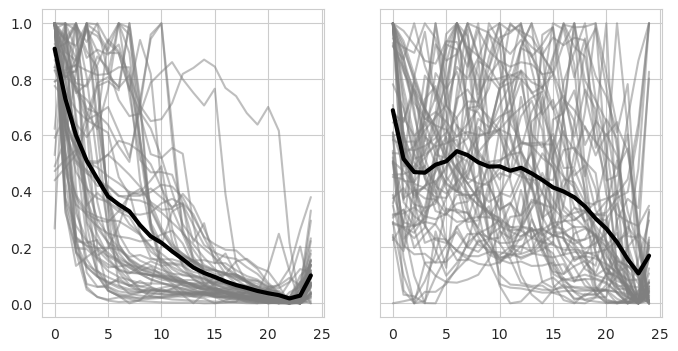

In [5]:
#APO and GAOX1
sns.set_style('whitegrid')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

value_cols = [f"idx{i}" for i in range(1, 25+1)]

#subset datasets
apo_data = data[data['sample_id'].str.contains('APO')]
gaox1_data = data[data['sample_id'].str.contains('GAOX1') & 
                  ~data['sample_id'].str.contains('HK') &
                 ~data['sample_id'].str.contains('PFAk')]

#plot apo
for index, row in apo_data.iterrows():
    values = list(row)[1:]
    sns.lineplot(values, ax=ax1, color='tab:gray', alpha=0.5)
#add mean value lines
sns.lineplot(list(apo_data.drop(columns=['sample_id']).mean(axis=0)), ax=ax1, color='black', linewidth=3)

#plot gaox1
for index, row in gaox1_data.iterrows():
    values = list(row)[1:]
    sns.lineplot(values, ax=ax2, color='tab:gray', alpha=0.5)
#add mean value lines
sns.lineplot(list(gaox1_data.drop(columns=['sample_id']).mean(axis=0)), ax=ax2, color='black', linewidth=3)

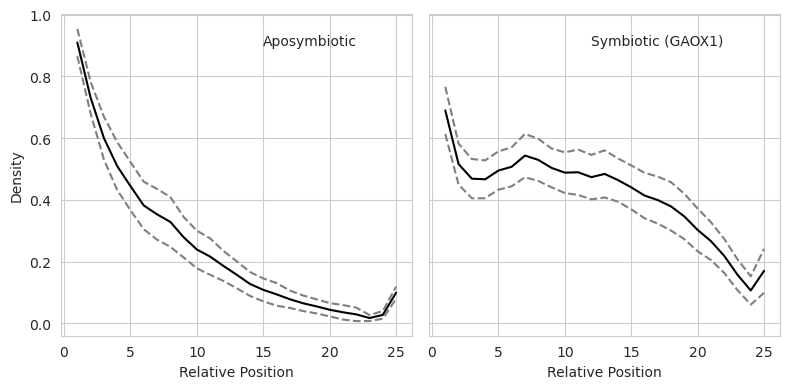

In [10]:
#APO and GAOX1 with CI
# Calculate mean for each column
apo_means = apo_data.drop(columns=['sample_id']).mean()

# Calculate confidence interval for each column
confidence_interval = 0.95
ci = apo_data.drop(columns=['sample_id']).apply(lambda col: stats.sem(col) * stats.t.ppf((1 + confidence_interval) / 2, len(col) - 1))

# Create a new DataFrame for mean, upper CI, and lower CI
apo_data_ci = pd.DataFrame({
    'mean': apo_means,
    'upper_ci': apo_means + ci,
    'lower_ci': apo_means - ci
}).transpose()


# Calculate mean for each column
gaox1_means = gaox1_data.drop(columns=['sample_id']).mean()

# Calculate confidence interval for each column
confidence_interval = 0.95
ci = gaox1_data.drop(columns=['sample_id']).apply(lambda col: stats.sem(col) * stats.t.ppf((1 + confidence_interval) / 2, len(col) - 1))

# Create a new DataFrame for mean, upper CI, and lower CI
gaox1_data_ci = pd.DataFrame({
    'mean': gaox1_means,
    'upper_ci': gaox1_means + ci,
    'lower_ci': gaox1_means - ci
}).transpose()

#APO and GAOX1
sns.set_style('whitegrid')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

x_positions = [i for i in range(1,25+1)]
#APO
#mean
sns.lineplot(y=apo_data_ci.loc['mean'], x=x_positions, ax=ax1, color='black')
#upper CI
sns.lineplot(y=apo_data_ci.loc['upper_ci'], x=x_positions, ax=ax1, color='tab:gray', linestyle='--')
#lower_ci
sns.lineplot(y=apo_data_ci.loc['lower_ci'], x=x_positions, ax=ax1, color='tab:gray', linestyle='--')

#GAOX1
#mean
sns.lineplot(y=gaox1_data_ci.loc['mean'], x=x_positions, ax=ax2, color='black')
#upper CI
sns.lineplot(y=gaox1_data_ci.loc['upper_ci'], x=x_positions, ax=ax2, color='tab:gray', linestyle='--')
#lower_ci
sns.lineplot(y=gaox1_data_ci.loc['lower_ci'], x=x_positions, ax=ax2, color='tab:gray', linestyle='--')

ax1.set_ylabel('Density')
ax1.set_xlabel('Relative Position')
ax2.set_xlabel('Relative Position')

ax1.text(15, 0.9, 'Aposymbiotic')
ax2.text(12, 0.9, 'Symbiotic (GAOX1)')

plt.tight_layout()
plt.savefig('../figures/apo_vs_gaox1.pdf')

<AxesSubplot:>

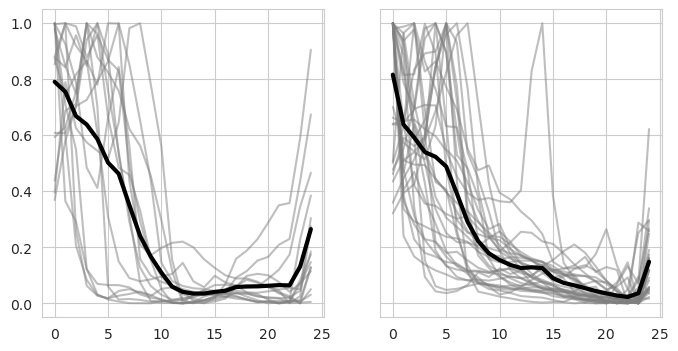

In [11]:
#GAOX1-HK and PFAK-GAOX1
sns.set_style('whitegrid')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

value_cols = ['idx1', 'idx2', 'idx3', 'idx4', 'idx5', 'idx6', 'idx7', 'idx8', 'idx9', 'idx10']

#subset datasets
hk_data = data[data['sample_id'].str.contains('GAOX1') &
               data['sample_id'].str.contains('HK')]
pfak_data = data[data['sample_id'].str.contains('GAOX1') & 
                 data['sample_id'].str.contains('PFAk')]

#plot hk
for index, row in hk_data.iterrows():
    values = list(row)[1:]
    sns.lineplot(values, ax=ax1, color='tab:gray', alpha=0.5)
#add mean value lines
sns.lineplot(list(hk_data.drop(columns=['sample_id']).mean(axis=0)), ax=ax1, color='black', linewidth=3)

#plot pfak
for index, row in pfak_data.iterrows():
    values = list(row)[1:]
    sns.lineplot(values, ax=ax2, color='tab:gray', alpha=0.5)
#add mean value lines
sns.lineplot(list(pfak_data.drop(columns=['sample_id']).mean(axis=0)), ax=ax2, color='black', linewidth=3)

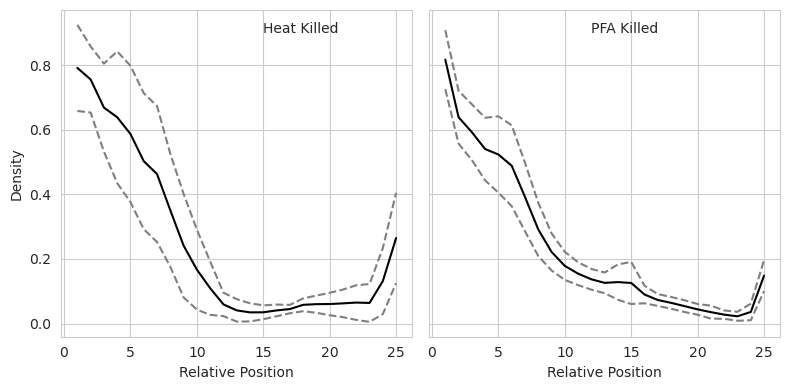

In [16]:
#APO and GAOX1 with CI
# Calculate mean for each column
hk_means = hk_data.drop(columns=['sample_id']).mean()

# Calculate confidence interval for each column
confidence_interval = 0.95
ci = hk_data.drop(columns=['sample_id']).apply(lambda col: stats.sem(col) * stats.t.ppf((1 + confidence_interval) / 2, len(col) - 1))

# Create a new DataFrame for mean, upper CI, and lower CI
hk_data_ci = pd.DataFrame({
    'mean': hk_means,
    'upper_ci': hk_means + ci,
    'lower_ci': hk_means - ci
}).transpose()


# Calculate mean for each column
pfak_means = pfak_data.drop(columns=['sample_id']).mean()

# Calculate confidence interval for each column
confidence_interval = 0.95
ci = pfak_data.drop(columns=['sample_id']).apply(lambda col: stats.sem(col) * stats.t.ppf((1 + confidence_interval) / 2, len(col) - 1))

# Create a new DataFrame for mean, upper CI, and lower CI
pfak_data_ci = pd.DataFrame({
    'mean': pfak_means,
    'upper_ci': pfak_means + ci,
    'lower_ci': pfak_means - ci
}).transpose()

#APO and GAOX1
sns.set_style('whitegrid')
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

x_positions = [i for i in range(1,25+1)]
#APO
#mean
sns.lineplot(y=hk_data_ci.loc['mean'], x=x_positions, ax=ax1, color='black')
#upper CI
sns.lineplot(y=hk_data_ci.loc['upper_ci'], x=x_positions, ax=ax1, color='tab:gray', linestyle='--')
#lower_ci
sns.lineplot(y=hk_data_ci.loc['lower_ci'], x=x_positions, ax=ax1, color='tab:gray', linestyle='--')

#GAOX1
#mean
sns.lineplot(y=pfak_data_ci.loc['mean'], x=x_positions, ax=ax2, color='black')
#upper CI
sns.lineplot(y=pfak_data_ci.loc['upper_ci'], x=x_positions, ax=ax2, color='tab:gray', linestyle='--')
#lower_ci
sns.lineplot(y=pfak_data_ci.loc['lower_ci'], x=x_positions, ax=ax2, color='tab:gray', linestyle='--')

ax1.set_ylabel('Density')
ax1.set_xlabel('Relative Position')
ax2.set_xlabel('Relative Position')

ax1.text(15, 0.9, 'Heat Killed')
ax2.text(12, 0.9, 'PFA Killed')

plt.tight_layout()

plt.savefig('../figures/hk_vs_pfak.pdf')